# 03.02 Plots in Three Dimensions

Working with three dimensional plotting can be confusing at best.
We only have a projection into two dimensions at any single time,
and the projection may not be a good representation.
That said, three dimensional plots are useful in certain circumstances
and we shall have some exposure to them.

![3D Walk](plt-dots-3d.svg)

<div style="text-align:right;"><sup>plt-dots-3d.svg</sup></div>

In `matplotlib` the three dimensional plotting was a later addition,
hence the imports work in a slightly different manner.
The import of the `mplot3d` toolkit for three dimensional plotting
alters the structure of `matplotlib` figures and allows for
three dimensional axes to be added to the figure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Let us get our hands dirty and plot a classic three dimensional function,
the *monkey saddle*:

$$
z = x^3 - 2xy^2
$$

Note that there exist a value for $z$ for ever *permutation* of values
of $x$ and $y$.
In other words, $z$ is a surface projected from every point on the $xy$-plane.
In order to achieve this we need `np.meshgrid`,
which creates a permutation of every point in $x$ and $y$
and returns the full set of permutations.
The plotting itself happens by using the `matplotlib` figure
as with every other plot.
The difference is that we explicitly add a set of axes
with the `3d` projection.
On these extended axes we can then performs three dimensional
plotting with specific functions, here a surface plot.

((512, 1024), (512, 1024), (512, 1024))

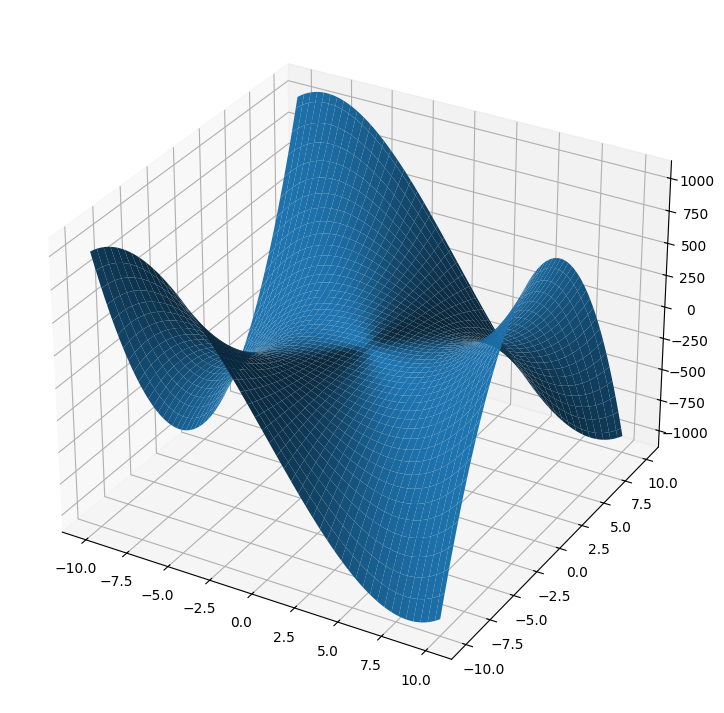

In [2]:
x = np.linspace(-10, 10, 1024)
y = np.linspace(-10, 10, 512)
gx, gy = np.meshgrid(x, y)

z = gx**3 - 2 * gx * gy**2

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(gx, gy, z)
gx.shape, gy.shape, z.shape

The function is called a monkey saddle because it has extra
space for the tail of the monkey sitting in it.

Okay, we can plot that *mesh grid* but what does `np.meshgrid`
actually does?
We shall attempt a simpler example,
here the surface function is trivial.

$$
z = 3x + y
$$

In [3]:
x = np.array([1, 2, 3])
y = np.array([7, 9])
gx, gy = np.meshgrid(x, y)
z = 3 * gx + gy
gx, gy, z

(array([[1, 2, 3],
        [1, 2, 3]]),
 array([[7, 7, 7],
        [9, 9, 9]]),
 array([[10, 13, 16],
        [12, 15, 18]]))

One can see that the mesh grid generated all permutations
between $1, 2, 3$ and $7, 9$.
Then the function is evaluated on the $2 x 3$ matrix.
Note that there is no need for the number of values
in $x$ and in $y$ to be the same,
the permutations will always result in matrices
of shape valued as the number of values in $x$
and the number of values in $y$.

The evaluation of the function itself
is easier to see if we reshape the permutations.
Here we see columns for $x$, $y$ and the evaluated $z$.

In [4]:
np.c_[gx.reshape(-1), gy.reshape(-1), z.reshape(-1)]

array([[ 1,  7, 10],
       [ 2,  7, 13],
       [ 3,  7, 16],
       [ 1,  9, 12],
       [ 2,  9, 15],
       [ 3,  9, 18]])

The mesh grid in NumPy is not limited to three dimensions.
As many things in NumPy, the limit is on human imagination
on what higher dimensional mesh grids represent
rather than the tool.
That said a use for a more than three dimensional
mesh grid is a vector field,
and we will see one soon.

First we need to notice that a surface plot is not the only
way in which one may plot a three dimensional function
such a the monkey saddle.
We can attempt a plot of contour curves.

Here we use normal `matplotlib` plotting
and use the `contour` function to build the contour lines.
The `level=` argument gives the number of regions between the lines.

((512, 1024), (512, 1024), (512, 1024))

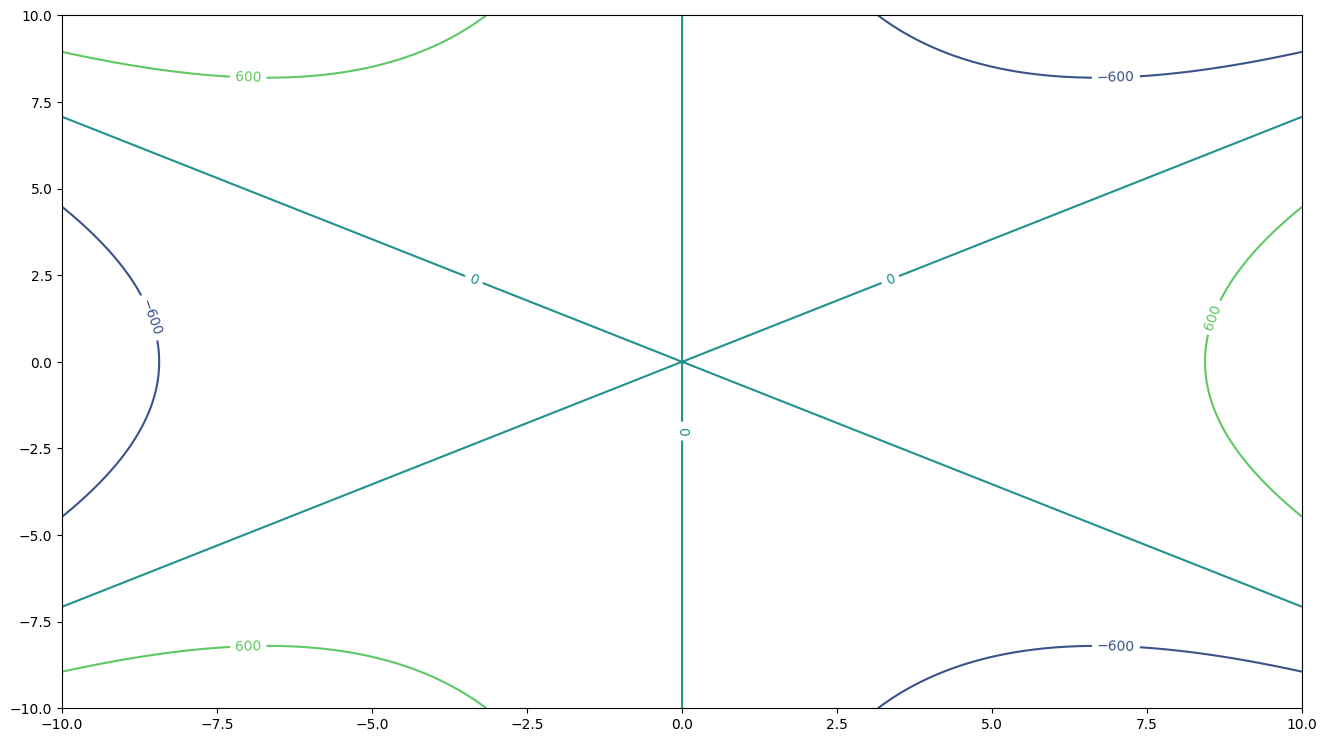

In [5]:
x = np.linspace(-10, 10, 1024)
y = np.linspace(-10, 10, 512)
gx, gy = np.meshgrid(x, y)

z = gx**3 - 2 * gx * gy**2

label_locations = [
    (7.0, -8.0),
    (-9.0, 1.0),
    (7.0, 8.0),
    (0.0, -2.0),
    (-3.0, 4.0),
    (3.0, 4.0),
    (-7.0, -8.0),
    (9.0, 1.0),
    (-7.0, 8.0),
]
fig, ax = plt.subplots(figsize=(16, 9))
c = ax.contour(gx, gy, z, levels=3)
cl = ax.clabel(c, manual=label_locations)
gx.shape, gy.shape, z.shape

A recurring pattern in `matplotlib` is the use of the return value
from the plotting function to modify its appearance.
Here we use `clabel` to label the contours.
That said, the clunkiness of `matplotlib` shows here.
The `clabel` function has the bad habit of placing labels
in overlapping locations or even in location out of the graph.
Above we manually force the locations of all labels.

The contour graph for the monkey saddle shows the three way
saddle: three contour lines at $600$ and three contour
lines at $-600$.
Yet, the surface plot for this specific function
makes for a better visualization.
The monkey saddle is the kind of function badly represented
by its contour lines.

Another set of three dimensional plots are images.
What? Yes, images, good flat images.
In an image we have the two coordinates of each pixel
and a third dimension as the value of that pixel.
Sometimes, plotting data as an image or
using an image as data itself in such a three dimensional
view is a viable approach.

Let's have a look at a simple array containing some
values between $0$ and $1$.

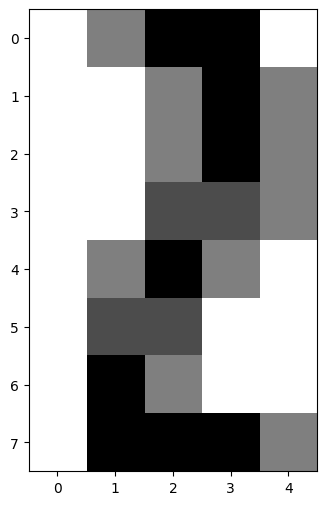

In [6]:
x = np.array(
    [
        [0.0, 0.5, 1.0, 1.0, 0.0],
        [0.0, 0.0, 0.5, 1.0, 0.5],
        [0.0, 0.0, 0.5, 1.0, 0.5],
        [0.0, 0.0, 0.7, 0.7, 0.5],
        [0.0, 0.5, 1.0, 0.5, 0.0],
        [0.0, 0.7, 0.7, 0.0, 0.0],
        [0.0, 1.0, 0.5, 0.0, 0.0],
        [0.0, 1.0, 1.0, 1.0, 0.5],
    ]
)
fig, ax = plt.subplots(figsize=(14, 6))
ax.imshow(x, cmap="binary");

And the use of `imshow` gives us a reasonable
description of a number $2$ in a $4$ by $8$ pixel display.
But wait, that was a matrix of values,
and a matrix ought to have two dimensions!
To be fair, the dimensionality of tabular data,
e.g. a matrix, depends on the interpretation of the data itself.
What we care about right now is the number of dimensions presented
in the displayed graph, and in the graph of the number $2$ above
that number of dimensions is $3$: horizontal position of pixel,
vertical position of pixel, and value of pixel.

We will eventually build a better description of dimensionality.
But for now, we will just argue that NumPy dimensions are
the number of values in the *shape* of the array,
and that the plot dimensions are the number of distinct
values we can read about a single point on the graph itself.
And for now we will not link one dimensionality to the other.

We will also come back to the `cmap=` argument soon enough.
For the time being we will just argue that *binary* here
means *black and white*.
And we need to use it because the default value for `cmap=`
make a colorful image.

---

To round this dimensionality trip let us look
at a six dimensional example:
To every point in three dimensions we will assign a
three dimensional vector.
Wherever you are on the function below,
if you follow the vectors you will reach zero
but you will not necessarily go through the shortest path.

The vector field below tend to move towards the $x$
and the $y$ axes,
i.e. one moves toward the $x$ or $y$ axis
with only negligible change in the $z$ coordinates.
Once a point has reached one of the axes
($x=0$, $y=0$, or both)
further vectors point towards the direction
of $z=0$.
If represented by surfaces,
the function would be an infinite number of
concentric curved funnels towards the origin.

Below we use the `scatter` to plot the points in three dimensions,
here the olive dots.
Then we use `quiver` (as in a bag of arrows) to plot all vectors.
`quiver` receives six coordinate arguments: three positions for the
tail of the vector and then three more values for the value of the
vector in each direction.
To allow for better visualization we normalize the vector values
between $0$ and $1$ with `normalize=True`;
and set camera elevation (on the $z$ axis) and azimuth (on the $xy$-plane)
with `view_init`.

((20, 20, 3), (20, 20, 3), (20, 20, 3), (20, 20, 3), (20, 20, 3), (20, 20, 3))

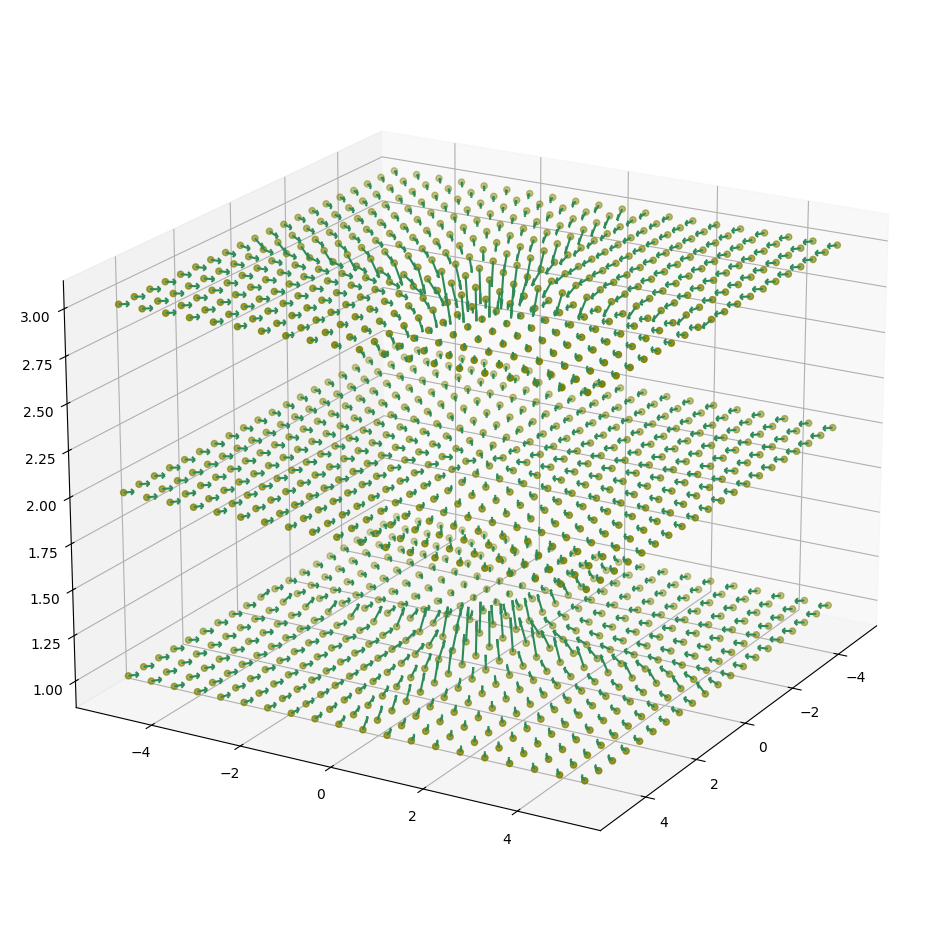

In [7]:
x, y, z = np.meshgrid(
    np.linspace(-5, 5, 20), np.linspace(-5, 5, 20), np.array([1.0, 2.0, 3.0])
)
u = (10 - 1 / x - 1 / y) * (-x)
v = (10 - 1 / x - 1 / y) * (-y)
w = 2 * (1 / np.abs(x) + 1 / np.abs(y)) * (2 - z)

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, color="olive")
ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True, color="seagreen")
ax.view_init(elev=20.0, azim=30)
x.shape, y.shape, z.shape, u.shape, v.shape, w.shape

We only have three planes because we gave only three values
for the last coordinate when building the mesh grid.
Despite the small number of planes we see the curved funnel
evolution of the vector field:
the closer a point is to one of the axes the faster it will go
to zero.
If a point is away from any of the axes it will first travel
on it plane in $z$ towards an axis, and only then
travel towards zero in $z$.

## References

[matplotlib - mplot3d tutorial][mplot3d]

[mplot3d]: https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html "mplot3d tutorial"